<a href="https://colab.research.google.com/github/01aleem/Mall-Customer-Segmentation/blob/main/Mall_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mall = pd.read_csv('/Mall_Customers.csv')

In [4]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
mall.duplicated().sum()

0

In [7]:
mall.shape

(200, 5)

In [8]:
# no significant correlation seen.
# cust id and income has been arranged in an ascending order hence the high correlation

mall.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [9]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# lets create a cluster model to check the pattern of clusters between income and spending

In [ ]:
x = mall.iloc[:,[3, 4]].values
x

In [13]:
wcss = [] # wcss = within cluster sum of squares
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

Text(0, 0.5, 'WCSS')

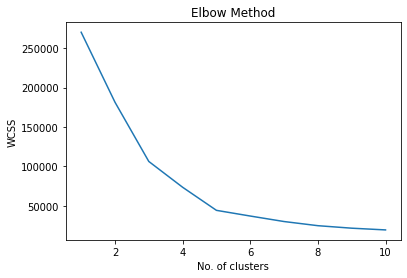

In [15]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [16]:
# We can see in the plot above that the values stop dropping sharply at x = 5. Hence we take k = 5

# k-value = 5

kmeans = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 300, n_init= 10, random_state = 0)
y_predict = kmeans.fit_predict(x)
y_predict

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [17]:
kmeans.cluster_centers_ # first column is the cluster means of annual income and 2nd column is that of spending scores

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [18]:
x[y_predict == 1, 1]

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65])

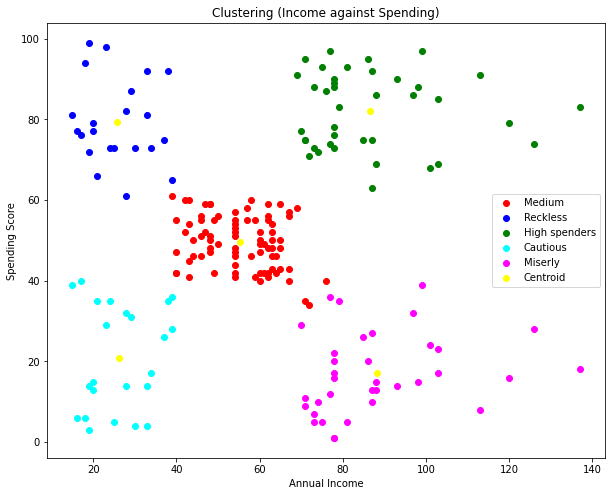

In [19]:
# plotting income and spending of each cluster

plt.figure(figsize = (10,8))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], c = 'red', label = 'Medium')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], c = 'blue', label = 'Reckless')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], c = 'green', label = 'High spenders')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], c = 'cyan', label = 'Cautious')
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], c = 'magenta', label = 'Miserly')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.title('Clustering (Income against Spending)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()